# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

# Summary Analysis
Notes have been included below the plots, but some overall highlights from this analysis are: 
* There is a strong relationship between city latitude and max temperature with max temperature peaking at the equator and dropping as the data got closer to the poles.
* Looking at the data by hemisphere, the linear regression showed no relationship between wind speed and latitude while the scatter plot appeared to show higher points at the poles. 
* There are weak or no relationships between cloudiness and humidity and latitude.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
from scipy.stats import linregress
from datetime import date

analysis_date = date.today().strftime("%m/%d/%y")

# Import API key
from api_keys import weather_api_key
units = 'imperial'

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f'Total Cities found: {len(cities)}')

Total Cities found: 622


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
print("""
Beginning Data Retrieval
-----------------------------
    """)
#set iterators for sets and records. there will be ten sets of fifty records to process.
s = 1
r = 0

#create lists for saving output
found_cities = []
lats = []
lngs = []
max_temps = []
humidities = []
cloudiness = []
wind_speeds = []
countries = []
dates = []

#begin iterating through city list
for city in cities:

    
    # query api for city
    url = f'http://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}&units={units}'
    response_json = requests.get(url).json()
#     pp.pprint(response_json)
    raw_df = response_json
#     pp.pprint(raw_df)
    
    
    try:
        # save name, lat, long, max temp, humidity, cloudiness, wind speed, country, and date for each city
        
        lats.append(raw_df['coord']['lat'])
        lngs.append(raw_df['coord']['lon'])
        max_temps.append(raw_df['main']['temp_max'])        
        humidities.append(raw_df['main']['humidity'])
        cloudiness.append(raw_df['clouds']['all'])
        wind_speeds.append(raw_df['wind']['speed'])
        countries.append(raw_df['sys']['country'])
        dates.append(raw_df['dt'])
        found_cities.append(city)
        
        #check if 50 records have been processed and move to the next batch
        if (r + 1) == 51:
            r = 1
            s += 1
        else: 
            r += 1

        print(f'Processing Record {r} of Set {s} | {city}')
        
    except KeyError:
        
        print("City not found. Skipping...")     
        
print("""
-----------------------------
Data Retrieval Complete
-----------------------------
    """)


Beginning Data Retrieval
-----------------------------
    
Processing Record 1 of Set 1 | bluff
Processing Record 2 of Set 1 | new norfolk
Processing Record 3 of Set 1 | kamareddi
City not found. Skipping...
Processing Record 4 of Set 1 | sisimiut
Processing Record 5 of Set 1 | victoria
Processing Record 6 of Set 1 | saint-pierre
Processing Record 7 of Set 1 | kamarion
Processing Record 8 of Set 1 | westport
Processing Record 9 of Set 1 | rikitea
Processing Record 10 of Set 1 | honningsvag
Processing Record 11 of Set 1 | mataura
City not found. Skipping...
Processing Record 12 of Set 1 | hilo
Processing Record 13 of Set 1 | mar del plata
Processing Record 14 of Set 1 | nyuksenitsa
Processing Record 15 of Set 1 | verkhnevilyuysk
Processing Record 16 of Set 1 | atuona
Processing Record 17 of Set 1 | port elizabeth
Processing Record 18 of Set 1 | mehamn
Processing Record 19 of Set 1 | dikson
Processing Record 20 of Set 1 | ilulissat
City not found. Skipping...
Processing Record 21 of Se

Processing Record 33 of Set 4 | igarka
Processing Record 34 of Set 4 | cabo san lucas
Processing Record 35 of Set 4 | nampa
Processing Record 36 of Set 4 | bonthe
Processing Record 37 of Set 4 | ust-omchug
City not found. Skipping...
Processing Record 38 of Set 4 | mareeba
Processing Record 39 of Set 4 | emerald
Processing Record 40 of Set 4 | goundam
Processing Record 41 of Set 4 | boyolangu
Processing Record 42 of Set 4 | kodiak
Processing Record 43 of Set 4 | kruisfontein
Processing Record 44 of Set 4 | fortuna
Processing Record 45 of Set 4 | ilula
Processing Record 46 of Set 4 | lufilufi
Processing Record 47 of Set 4 | solnechnyy
Processing Record 48 of Set 4 | the valley
Processing Record 49 of Set 4 | turayf
Processing Record 50 of Set 4 | russkaya polyana
Processing Record 1 of Set 5 | georgetown
Processing Record 2 of Set 5 | kununurra
Processing Record 3 of Set 5 | avarua
Processing Record 4 of Set 5 | novi banovci
Processing Record 5 of Set 5 | tarauaca
Processing Record 6 of

Processing Record 24 of Set 8 | ambilobe
City not found. Skipping...
Processing Record 25 of Set 8 | nome
Processing Record 26 of Set 8 | merauke
Processing Record 27 of Set 8 | ayan
City not found. Skipping...
Processing Record 28 of Set 8 | korla
Processing Record 29 of Set 8 | camacupa
Processing Record 30 of Set 8 | cabrobo
Processing Record 31 of Set 8 | kautokeino
Processing Record 32 of Set 8 | polonnaruwa
Processing Record 33 of Set 8 | arcos
Processing Record 34 of Set 8 | padre bernardo
Processing Record 35 of Set 8 | boyabat
Processing Record 36 of Set 8 | brae
Processing Record 37 of Set 8 | nishihara
Processing Record 38 of Set 8 | panaba
Processing Record 39 of Set 8 | chihuahua
Processing Record 40 of Set 8 | kathmandu
Processing Record 41 of Set 8 | manado
Processing Record 42 of Set 8 | mwene-ditu
Processing Record 43 of Set 8 | chivilcoy
Processing Record 44 of Set 8 | magadan
Processing Record 45 of Set 8 | clarence town
Processing Record 46 of Set 8 | pangody
Proces

Processing Record 12 of Set 12 | gat
Processing Record 13 of Set 12 | biak
City not found. Skipping...
Processing Record 14 of Set 12 | tanhacu
Processing Record 15 of Set 12 | agadir
Processing Record 16 of Set 12 | toamasina
Processing Record 17 of Set 12 | canandaigua
Processing Record 18 of Set 12 | mantua

-----------------------------
Data Retrieval Complete
-----------------------------
    


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
#prepare dict for dataframe from lists created with api
prep_df = {
    'City':found_cities,
    'Lat':lats,
    'Lng':lngs,
    'Max Temp':max_temps,
    'Humidity':humidities,
    'Cloudiness':cloudiness,
    'Wind Speed':wind_speeds, 
    'Country':countries,
    'Date':dates
}

#create dataframe
city_data = pd.DataFrame(prep_df)

#export to csv
city_data.to_csv(output_data_file, index_label='City ID')


In [5]:
# describe city_data
city_data.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,5.680000e+02
mean,18.567779,21.410554,51.691549,73.375000,56.042254,7.694507,1.613104e+09
std,33.377770,91.540692,32.616273,18.614872,39.511769,6.010969,2.884660e+02
min,-54.800000,-175.200000,-40.000000,17.000000,0.000000,0.220000,1.613104e+09
25%,-8.689375,-57.830675,29.600000,64.000000,13.750000,3.440000,1.613104e+09
50%,21.283300,25.468400,64.275000,77.000000,75.000000,6.085000,1.613104e+09
75%,46.572525,105.734975,76.515000,88.000000,93.000000,10.360000,1.613104e+09
max,78.218600,178.416700,95.000000,100.000000,100.000000,47.180000,1.613104e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
#  Get the indices of cities that have humidity over 100%.


In [7]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

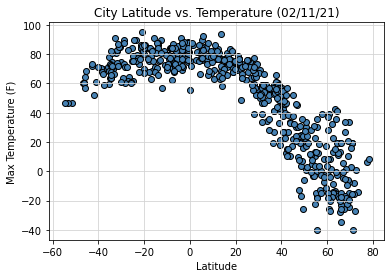

In [8]:
#set up scatter plot
x_values = city_data["Lat"]
y_values = city_data["Max Temp"]
plt.scatter(x_values,y_values,edgecolors="black",facecolors="steelblue")
plt.title(f"City Latitude vs. Temperature ({analysis_date})")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("images/Latitude_v_Temperature.png")
plt.show()

### Analysis
The scatter plot above shows the relationship between the maximum temperature and the city latitude. Typically temperature gets higher as you get closer to 0 latitude and lower as you move into the higher latitudes. 

## Latitude vs. Humidity Plot

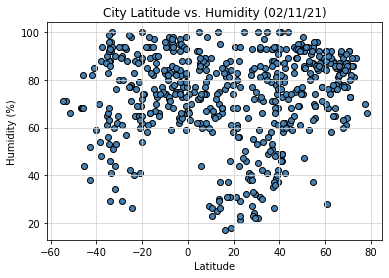

In [9]:
#set up scatter plot
x_values = city_data["Lat"]
y_values = city_data["Humidity"]
plt.scatter(x_values,y_values,edgecolors="black",facecolors="steelblue")
plt.title(f"City Latitude vs. Humidity ({analysis_date})")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("images/Latitude_v_Humidity.png")
plt.show()


### Analysis
The scatter plot above shows the relationship between humidity and the city latitude. The points are scattered around more here than they were when looking at temperature. This might be because humidity is less affected by latitude than it might be by proximity to bodies of water. 

## Latitude vs. Cloudiness Plot

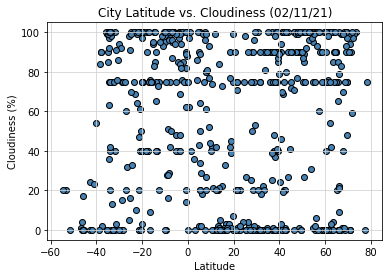

In [10]:
#set up scatter plot
x_values = city_data["Lat"]
y_values = city_data["Cloudiness"]
plt.scatter(x_values,y_values,edgecolors="black",facecolors="steelblue")
plt.title(f"City Latitude vs. Cloudiness ({analysis_date})")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("images/Latitude_v_Cloudiness.png")
plt.show()


### Analysis
The scatter plot above shows the relationship between cloudiness and the city latitude. The points are scattered everywhere here - even moreso than the humidity plot. This might suggest that these two variables are unrelated.

## Latitude vs. Wind Speed Plot

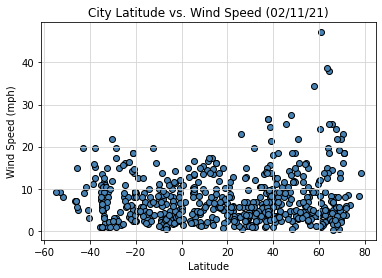

In [11]:
#set up scatter plot
x_values = city_data["Lat"]
y_values = city_data["Wind Speed"]
plt.scatter(x_values,y_values,edgecolors="black",facecolors="steelblue")
plt.title(f"City Latitude vs. Wind Speed ({analysis_date})")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("images/Latitude_v_WindSpeed.png")
plt.show()


### Analysis
The scatter plot above shows the relationship between wind speed and the city latitude. The points here seem to be gathered more at the poles. This might suggest that it is more windy as you get closer to the poles.

## Linear Regression

In [12]:
#get data for each hemisphere
north = city_data.loc[city_data['Lat']>=0, :]
# north.describe()

south = city_data.loc[city_data['Lat']<0, :]
# south.describe()

### Max Temp vs. Latitude by Hemisphere

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-vlaue is: -0.886683904039172


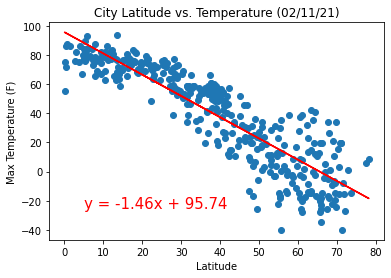

In [13]:
#set up scatter plot
x_values = north["Lat"]
y_values = north["Max Temp"]
plt.scatter(x_values,y_values)
plt.title(f"City Latitude vs. Temperature ({analysis_date})")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')

# linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-vlaue is: {rvalue}")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5,-25),fontsize=15,color="red")
plt.savefig("images/North_Latitude_v_Temperature_LineRegress.png")
plt.show()


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-vlaue is: 0.5047754933860932


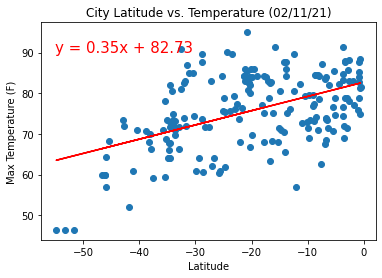

In [14]:
#set up scatter plot
x_values = south["Lat"]
y_values = south["Max Temp"]
plt.scatter(x_values,y_values)
plt.title(f"City Latitude vs. Temperature ({analysis_date})")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')

# linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-vlaue is: {rvalue}")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,90),fontsize=15,color="red")
plt.savefig("images/South_Latitude_v_Temperature_LineRegress.png")
plt.show()


## Analysis
Here we added a linear regression analysis to the scatter plot for temperature and narrowed in on the northern and southern hemispheres. The northern hemisphere has a strong correlation between temperature and latitude while the southern shows a more moderate correlation.  

### Humidity (%) vs. Latitude by Hemisphere

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-vlaue is: 0.28020128526112364


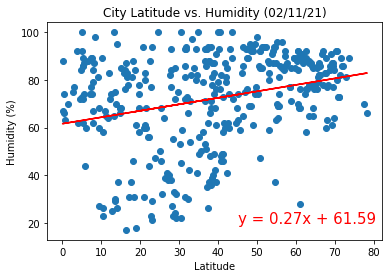

In [15]:
#set up scatter plot
x_values = north["Lat"]
y_values = north["Humidity"]
plt.scatter(x_values,y_values)
plt.title(f"City Latitude vs. Humidity ({analysis_date})")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

# linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-vlaue is: {rvalue}")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(45,20),fontsize=15,color="red")
plt.savefig("images/North_Latitude_v_Humidity_LineRegress.png")
plt.show()


####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-vlaue is: 0.2333791379891112


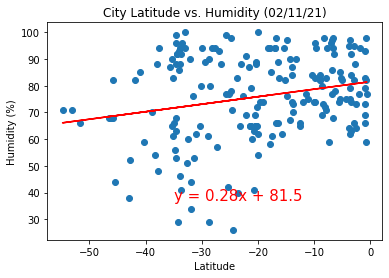

In [16]:
#set up scatter plot
x_values = south["Lat"]
y_values = south["Humidity"]
plt.scatter(x_values,y_values)
plt.title(f"City Latitude vs. Humidity ({analysis_date})")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

# linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-vlaue is: {rvalue}")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-35,37),fontsize=15,color="red")
plt.savefig("images/South_Latitude_v_Humidity_LineRegress.png")
plt.show()


## Analysis
Here we added a linear regression analysis to the scatter plot for humidity and narrowed in on the northern and southern hemispheres. Neither hemisphere shows a strong correlation between latitude and humidity. They both have r values under 0.3.

### Cloudiness (%) vs. Latitude by Hemisphere

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-vlaue is: 0.2458106346679334


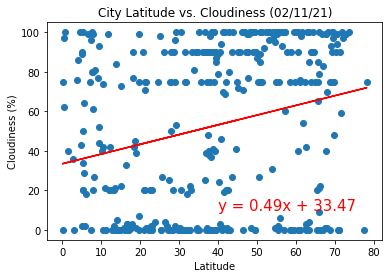

In [17]:
#set up scatter plot
x_values = north["Lat"]
y_values = north["Cloudiness"]
plt.scatter(x_values,y_values)
plt.title(f"City Latitude vs. Cloudiness ({analysis_date})")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

# linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-vlaue is: {rvalue}")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,10),fontsize=15,color="red")
plt.savefig("images/North_Latitude_v_Cloudiness_LineRegress.png")
plt.show()


####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-vlaue is: 0.37148382883436987


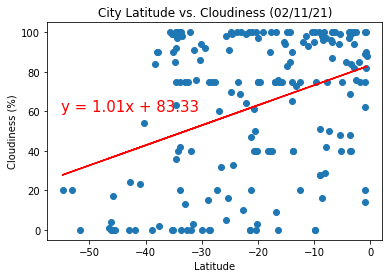

In [18]:
#set up scatter plot
x_values = south["Lat"]
y_values = south["Cloudiness"]
plt.scatter(x_values,y_values)
plt.title(f"City Latitude vs. Cloudiness ({analysis_date})")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

# linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-vlaue is: {rvalue}")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,60),fontsize=15,color="red")
plt.savefig("images/South_Latitude_v_Cloudiness_LineRegress.png")
plt.show()


## Analysis
Here we added a linear regression analysis to the scatter plot for cloudiness and narrowed in on the northern and southern hemispheres. Neither hemisphere shows a strong correlation between latitude and cloudiness. They both have r values around 0.3.

### Wind Speed (mph) vs. Latitude by Hemisphere

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-vlaue is: 0.13851931255778388


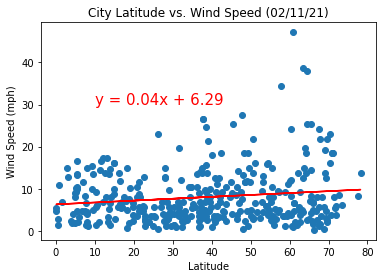

In [19]:
#set up scatter plot
x_values = north["Lat"]
y_values = north["Wind Speed"]
plt.scatter(x_values,y_values)
plt.title(f"City Latitude vs. Wind Speed ({analysis_date})")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')

# linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-vlaue is: {rvalue}")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,30),fontsize=15,color="red")
plt.savefig("images/North_Latitude_v_WindSpeed_LineRegress.png")
plt.show()


####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-vlaue is: -0.20957574192634462


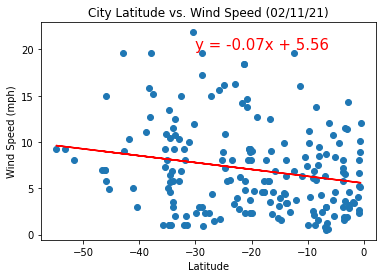

In [20]:
#set up scatter plot
x_values = south["Lat"]
y_values = south["Wind Speed"]
plt.scatter(x_values,y_values)
plt.title(f"City Latitude vs. Wind Speed ({analysis_date})")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')

# linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-vlaue is: {rvalue}")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,20),fontsize=15,color="red")
plt.savefig("images/South_Latitude_v_WindSpeed_LineRegress.png")
plt.show()


## Analysis
Here we added a linear regression analysis to the scatter plot for wind speed and narrowed in on the northern and southern hemispheres. While it looked like there might be some relationship between wind speed and latitude in the previous plot, looking at it by hemisphere demonstrates a weak correlation. Both r values are under 0.3.

# Bonus
Generate four plots from one loop.

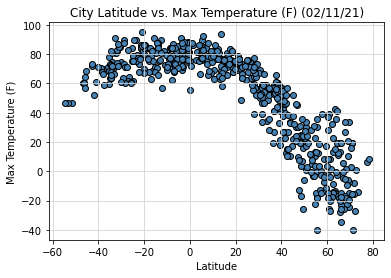

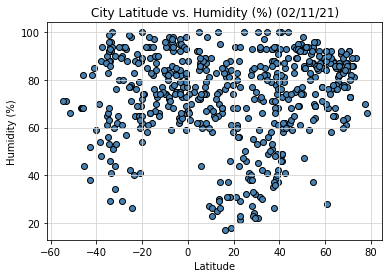

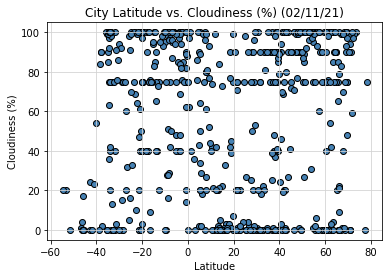

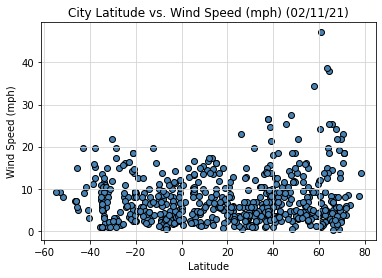

In [21]:
city_data.columns = ['City', 'Lat', 'Lng', 'Max Temperature (F)', 'Humidity (%)', 'Cloudiness (%)',
       'Wind Speed (mph)', 'Country', 'Date']

x_values = city_data["Lat"]
for column in city_data[['Max Temperature (F)', 'Humidity (%)', 'Cloudiness (%)', 'Wind Speed (mph)']]:
    y_values = city_data[column]
    plt.scatter(x_values,y_values,edgecolors="black",facecolors="steelblue")
    plt.title(f"City Latitude vs. {column} ({analysis_date})")
    plt.xlabel('Latitude')
    plt.ylabel(column)
    plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
    plt.savefig(f"images/bonus/Latitude_v_{column}.png")
    plt.show()